Epoch 1/100
137/137 [==============================] - 26s 109ms/step - loss: 0.0051
Epoch 2/100
137/137 [==============================] - 15s 110ms/step - loss: 0.0015
Epoch 3/100
137/137 [==============================] - 18s 129ms/step - loss: 0.0013
Epoch 4/100
137/137 [==============================] - 16s 114ms/step - loss: 9.5453e-04
Epoch 5/100
137/137 [==============================] - 16s 114ms/step - loss: 8.5601e-04
Epoch 6/100
137/137 [==============================] - 15s 113ms/step - loss: 8.8667e-04
Epoch 7/100
137/137 [==============================] - 15s 110ms/step - loss: 9.4291e-04
Epoch 8/100
137/137 [==============================] - 15s 109ms/step - loss: 8.9003e-04
Epoch 9/100
137/137 [==============================] - 15s 111ms/step - loss: 8.4760e-04
Epoch 10/100
137/137 [==============================] - 15s 110ms/step - loss: 8.3771e-04
Epoch 11/100
137/137 [==============================] - 16s 115ms/step - loss: 8.7336e-04
Epoch 12/100
137/137 [=========

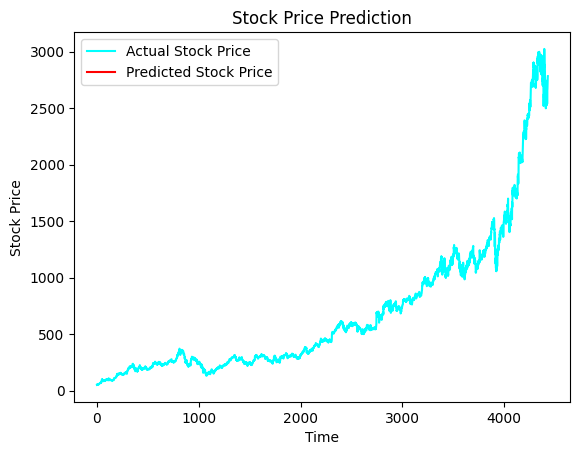

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load the datase
df = pd.read_csv(r"/content/GOOGL.csv")
df.head()

# Extract the 'Open' column as the feature to predict
df = df.iloc[:,1:2].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(df)

# Prepare the training data
xtrain = []
ytrain = []
for i in range(60, len(df)):
    xtrain.append(scaled_df[i-60:i, 0])
    ytrain.append(scaled_df[i, 0])
xtrain, ytrain = np.array(xtrain), np.array(ytrain)

# Reshape xtrain for LSTM input [samples, time steps, features]
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))

# Build the LSTM model
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
regressor.fit(xtrain, ytrain, epochs=100, batch_size=32)

# Prepare test data
df_test = pd.read_csv(r"/content/GOOGL.csv")
actual_stock_price = df_test.iloc[:, 1:2].values

# Concatenate the original and test data for preparing inputs
# Convert df to a DataFrame before concatenation
df_total = pd.concat((pd.DataFrame(df), df_test.iloc[:, 1:2]), axis=0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

# ... rest of your code ...

xtest = []
for i in range(60, 80):
    xtest.append(inputs[i-60:i, 0])
xtest = np.array(xtest)
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))

# Predicting the stock price
predicted_stock_price = regressor.predict(xtest)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualizing the results
plt.plot(actual_stock_price, color='cyan', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# New section